In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import getdist

In [2]:
def test_params(r,deltaN,mp,me,alpha):
    try:
        settings = {'output':'mPk',
           'omega_b':0.0224,
           'omega_cdm':0.119,
           '100*theta_s':1.04,
           'ln10^{10}A_s':3.05,
           'n_s':0.965,
           'tau_reio':0.0576,
            'YHe_twin':0,
           'r_all_twin':r,
           'Delta_N_twin':deltaN,
           'm_p_dark':mp,
            'm_e_dark':me,
            'alpha_dark':alpha}
        M = Class()
        M.set(settings)
        M.compute()
    except:
        return False
    else:
        return True


In [4]:
#July 11
for r in [0.1]:
    for Delta_N in [0.1]:#np.logspace(-1,np.log10(0.5),5):
        for m_p_dark in [1]:#np.logspace(0,2,25):
            for m_e_dark in [0.01]:#np.logspace(-4,-1,3):
                for alpha_dark in [0.01]:
                    good=test_params(r,Delta_N,m_p_dark,m_e_dark,alpha_dark)
                    if good:
                        print('good')
                    if not good:
                        print(r,Delta_N,m_p_dark,m_e_dark,alpha_dark)

good


In [5]:
r=0.1
deltaN=0.1
mp=1
me=0.001
alpha=0.03
settings = {'output':'mPk',
   'omega_b':0.0224,
   'omega_cdm':0.119,
   '100*theta_s':1.04,
   'ln10^{10}A_s':3.05,
   'n_s':0.965,
   'tau_reio':0.0576,
    'YHe_twin':0,
   'r_all_twin':r,
   'Delta_N_twin':deltaN,
   'm_p_dark':mp,
    'm_e_dark':me,
    'alpha_dark':alpha}
M = Class()
M.set(settings)
M.compute()
thermo= M.get_thermodynamics()

Text(0.5, 1.0, 'ADM Ionization Fraction')

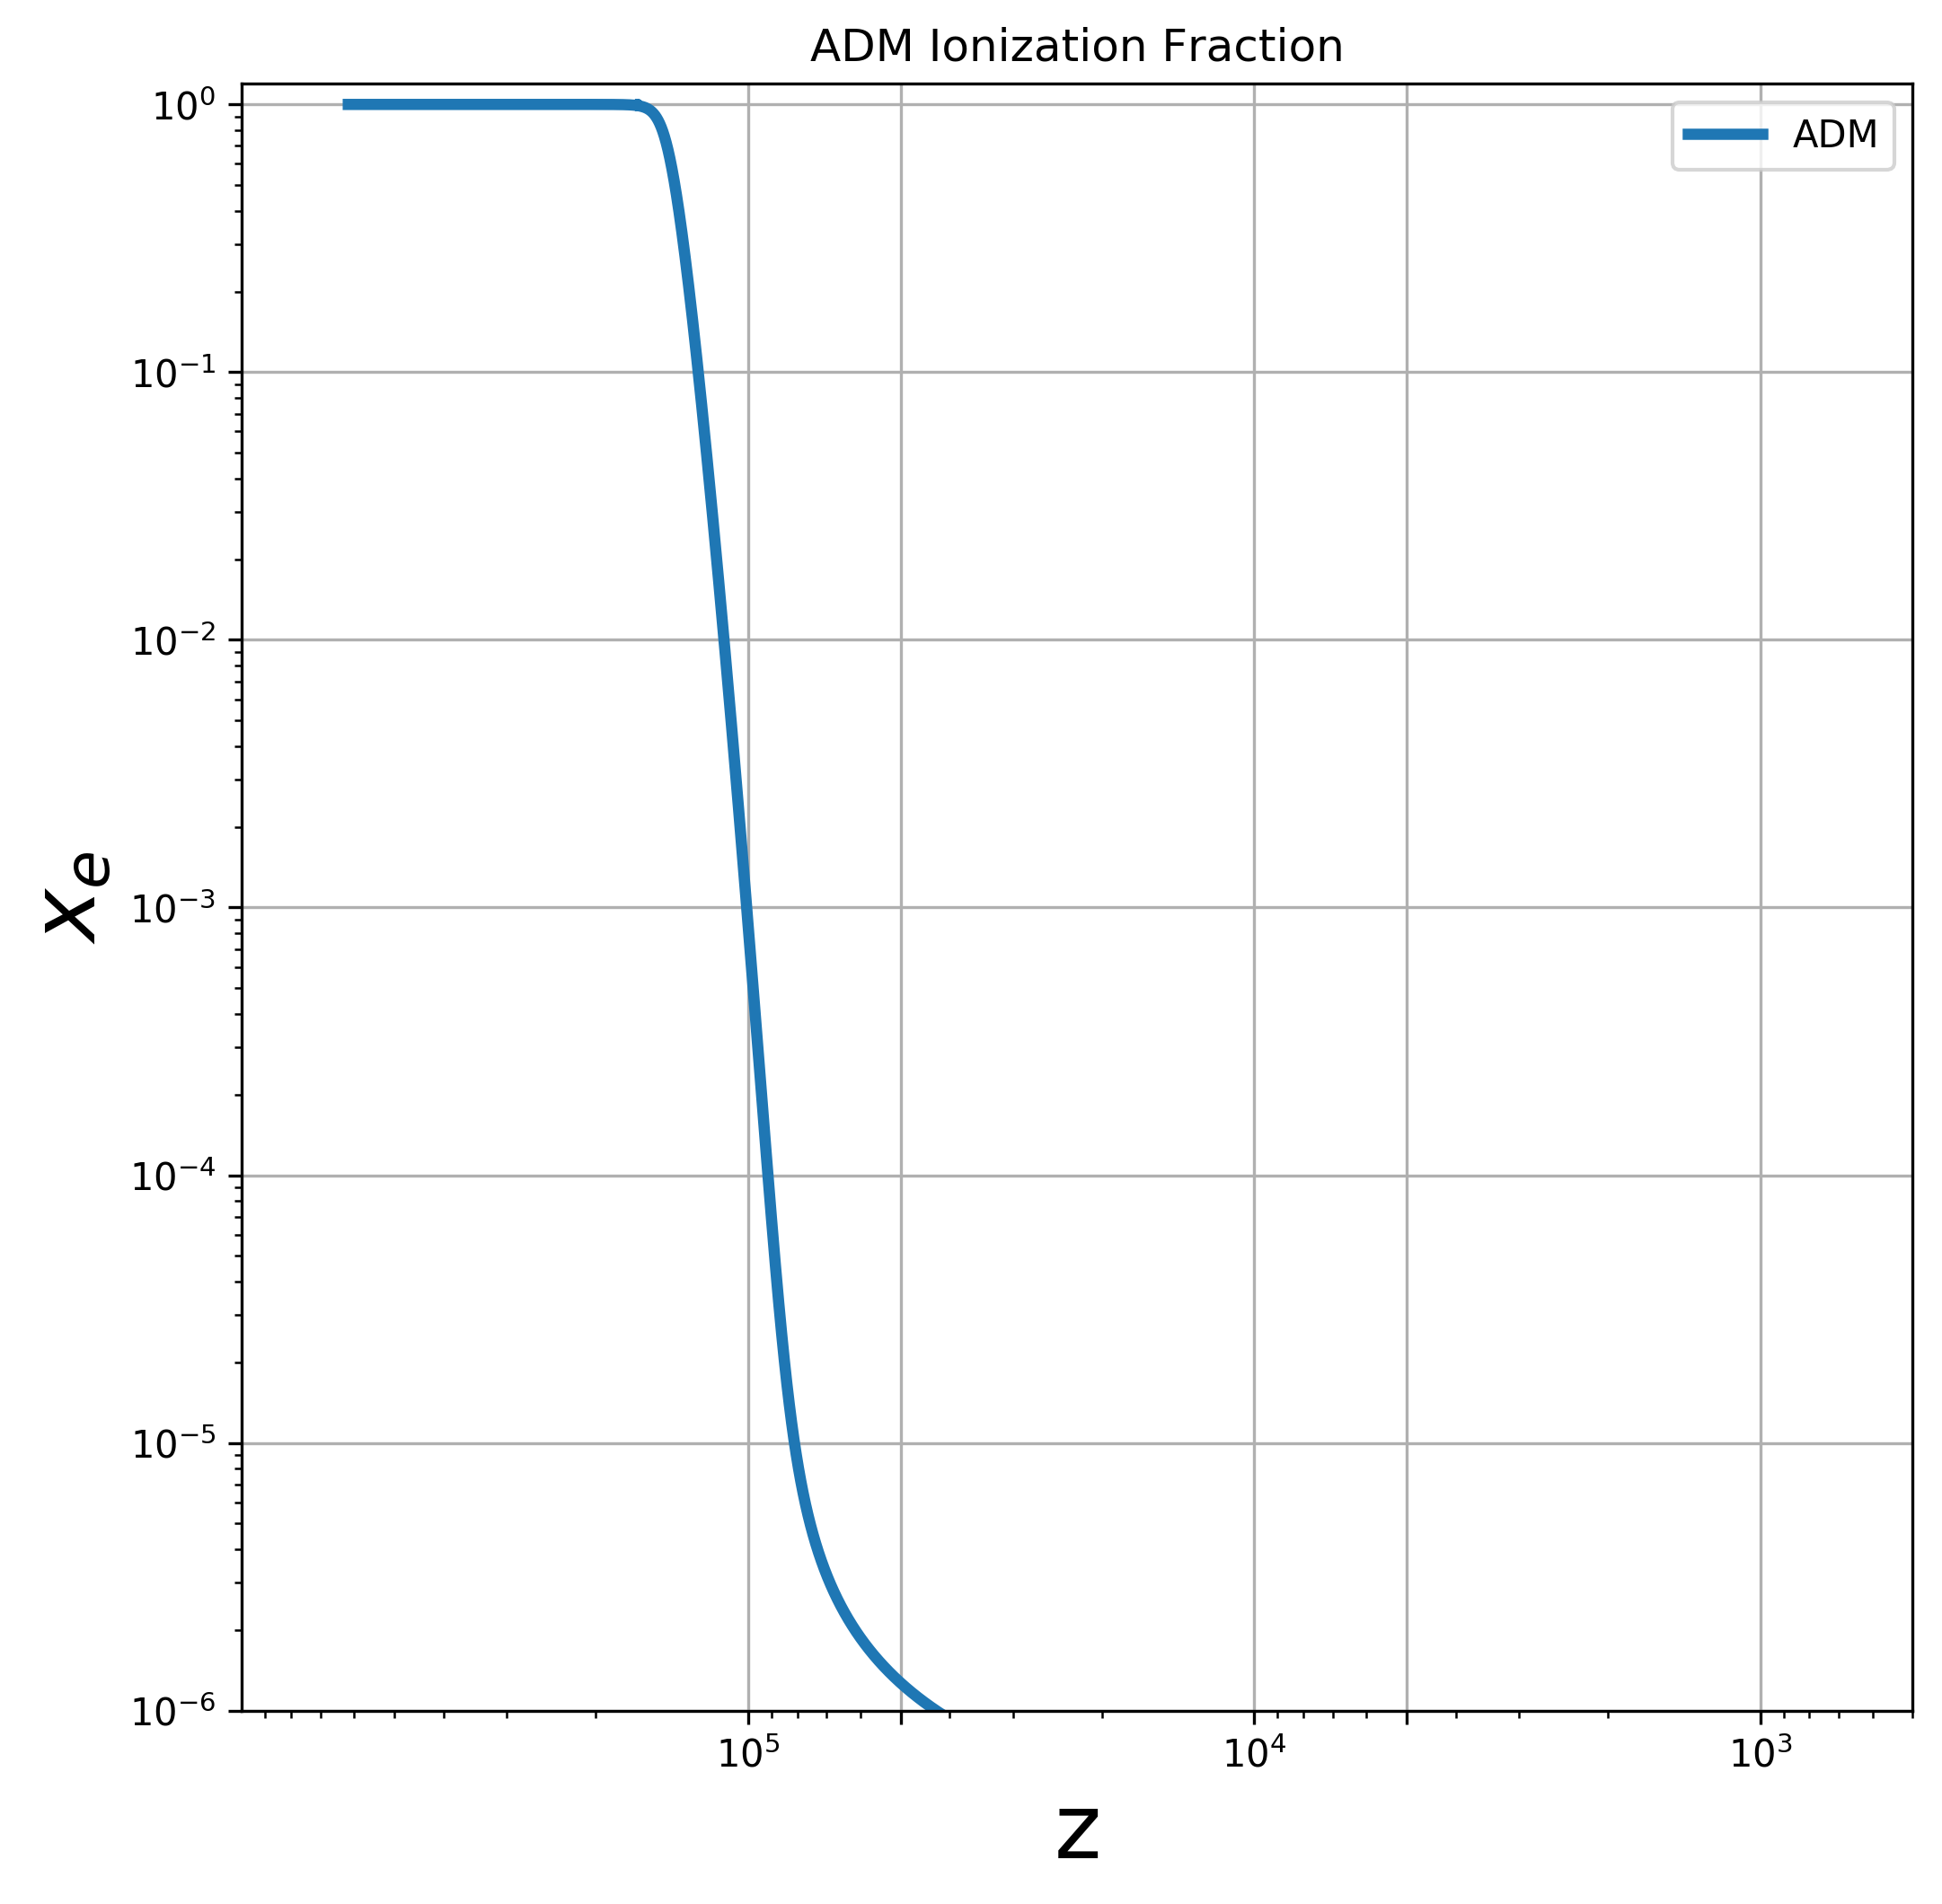

In [6]:

plt.figure(figsize=(8,8),dpi=300)
plt.semilogx(thermo['z'],thermo['x_e_twin'],label='ADM',lw=3)
plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
plt.grid()

plt.xlim(5*10**2,10**6)
plt.ylim(10**-6,1.2)
plt.semilogy()
plt.gca().invert_xaxis()
plt.legend()
#plt.text(10**5.9,10**-3.3,'Baseline: $\hat{r}$ = 0.1,$\\Delta N_{eff}$ = 0.1,\n$m_{p}$\' = 1 GeV, $m_{e}$\' = 1 MeV, $\\alpha$\' = 0.01',fontsize=10, bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'))
plt.xlabel('z',fontsize=24)
plt.ylabel('$x_e$',fontsize=24)
plt.title('ADM Ionization Fraction')